<a href="https://colab.research.google.com/github/randy-ar/gcolab/blob/main/Explanatory_Data_Analysis_EPA_Chemical_Data_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00


# Read Data CSV

In [ ]:
table_cleaned = "11TI7svFqRc3TirVVrAfntngN77WEBldL"
download_url = "https://docs.google.com/uc?export=download&id="

In [ ]:
gdown.download(download_url+table_cleaned, 'df.csv', quiet=False)

Downloading...
From: https://docs.google.com/uc?export=download&id=11TI7svFqRc3TirVVrAfntngN77WEBldL
To: /content/df.csv
100%|██████████| 20.3M/20.3M [00:00<00:00, 72.3MB/s]


'df.csv'

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df.count()

,0
CHEMICAL ID,52869
CHEMICAL NAME,52869
CHEMICAL ID TYPE,52869
RECYCLED,52869
PHYSICAL FORM(S),52869
2019 DOMESTIC PV,52869
2019 IMPORT PV,52869
2019 PV,52869
2018 PV,52869
2017 PV,52869


# EDA

## Nomor 1

### Kepadatan production value pada setiap states

In [ ]:
# prompt: i want Choropleth map describe sum 2019 PV in each state
df_state_pv_2019 = df.groupby('SITE STATE')['2019 PV'].sum().reset_index()

fig = px.choropleth(df_state_pv_2019,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='2019 PV',
                    scope="usa",
                    color_continuous_scale="Reds",
                    title="Sum of PV in each state in 2019",
                    labels={
                        '2019 PV': 'Production Value',
                        'SITE STATE': 'State',
                        }
                    )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()
fig.write_image("Sum of PV in each state in 2019.png")

### Kepadatan pekerja yang terlibat dengan bahan kimia

In [ ]:
# prompt: i want Choropleth map describe sum WORKERS in each city

# Aggregate WORKERS by City
df_city_workers = df.groupby('SITE CITY')['WORKERS MEDIAN'].sum().reset_index()
df_state_workers = df.groupby('SITE STATE')['WORKERS MEDIAN'].sum().reset_index()

fig = px.choropleth(df_state_workers,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='WORKERS MEDIAN',
                    scope="usa",
                    color_continuous_scale="Reds",
                    title="Sum of Workers in each State")
fig.show()

### CSV For Flourish Chart

In [ ]:
# prompt: I want sum of 2019 PV group by SITE STATE, I want SITE STATE, SITE STATE NAME and 2019 PV column. Export to csv

df_export = df.groupby(['SITE STATE', 'SITE STATE NAME'])['2019 PV'].sum().reset_index()

df_export.to_csv('state_2019_pv.csv', index=False)

In [ ]:
df_city_workers_sum = df.groupby(['SITE CITY', 'SITE LATITUDE', 'SITE LONGITUDE'])['WORKERS MEDIAN'].sum().reset_index()
df_city_workers_sum['WORKERS MEDIAN'] = df_city_workers_sum['WORKERS MEDIAN'].astype(int) # This line converts to integer, removing the decimal part

df_city_workers_sum.to_csv('city_workers_median_sum.csv', index=False)

## Nomor 2

### Bahan kimia yang tidak didaur ulang

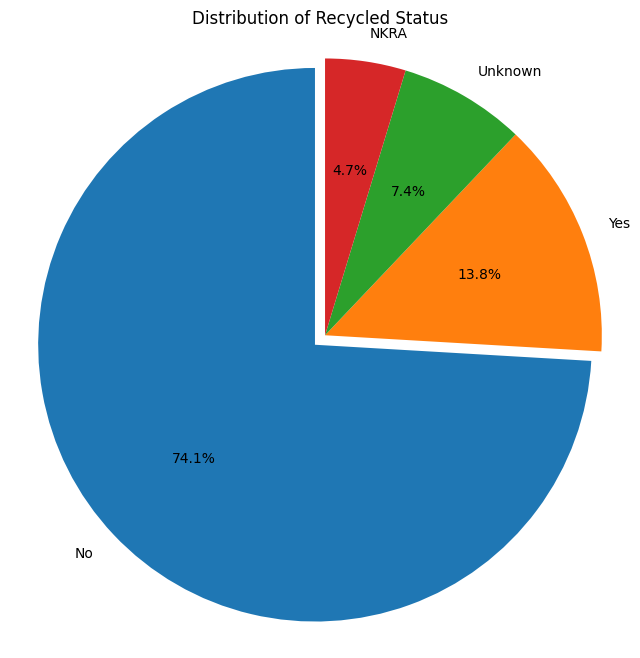

In [ ]:
recycled_counts = df['RECYCLED'].value_counts()

labels = recycled_counts.index
sizes = recycled_counts.values
explode = [0.05 if label == 'No' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recycled Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bahan Kimia yang terdaftar sebagai TSCA

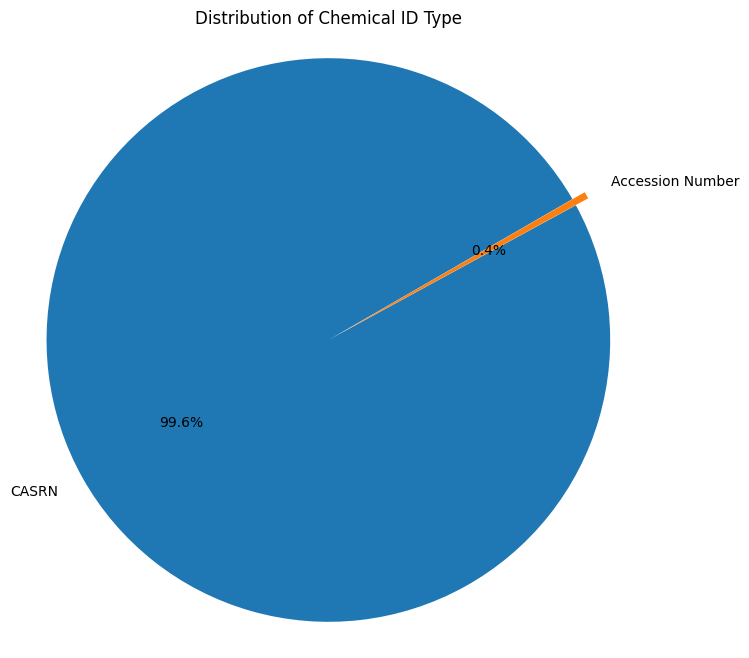

In [ ]:
chemical_type_counts = df['CHEMICAL ID TYPE'].value_counts()

labels = chemical_type_counts.index
sizes = chemical_type_counts.values
explode = [0.05 if label == 'Accession Number' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Chemical ID Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

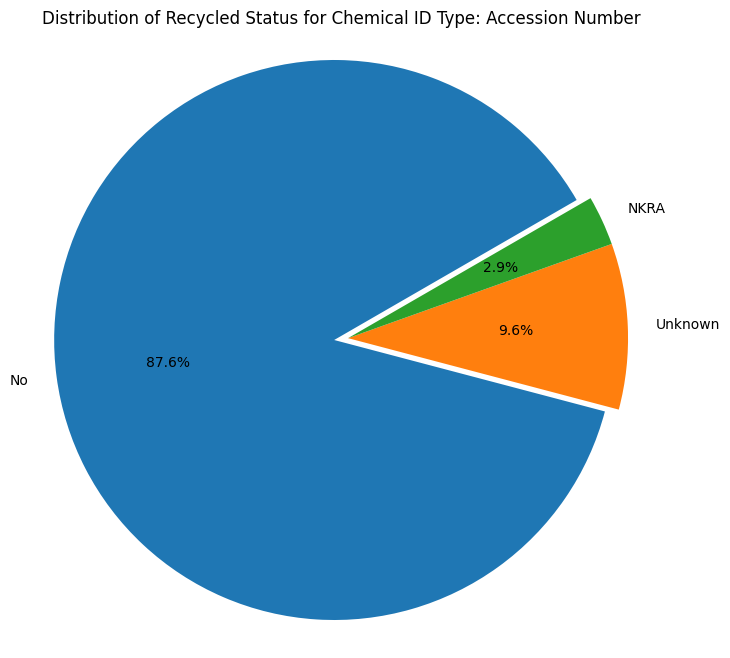

In [ ]:
# prompt: show distribution recycled where chemical id type is Accession Number

import matplotlib.pyplot as plt
# Filter the dataframe where 'CHEMICAL ID TYPE' is 'Accession Number'
df_accession_number = df[df['CHEMICAL ID TYPE'] == 'Accession Number']

# Get the value counts for the 'RECYCLED' column in the filtered dataframe
recycled_accession_counts = df_accession_number['RECYCLED'].value_counts()

labels_accession = recycled_accession_counts.index
sizes_accession = recycled_accession_counts.values
explode_accession = [0.05 if label == 'No' else 0 for label in labels_accession]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes_accession, explode=explode_accession, labels=labels_accession, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Recycled Status for Chemical ID Type: Accession Number')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### TOP Production Value yang tidak di daur ulang

In [ ]:
df.columns

Index(['CHEMICAL ID', 'CHEMICAL NAME', 'CHEMICAL ID TYPE', 'RECYCLED',
       'PHYSICAL FORM(S)', '2019 DOMESTIC PV', '2019 IMPORT PV', '2019 PV',
       '2018 PV', '2017 PV', '2016 PV', 'SITE LATITUDE', 'SITE LONGITUDE',
       'SITE CITY', 'SITE COUNTY / PARISH', 'SITE STATE', 'SITE POSTAL CODE',
       'SITE NAICS CODE 1', 'SITE NAICS ACTIVITY 1', 'SITE NAICS CODE 2',
       'SITE NAICS ACTIVITY 2', 'SITE NAICS CODE 3', 'SITE NAICS ACTIVITY 3',
       'WORKERS CODE', 'WORKERS', 'MAX CONC CODE', 'MAXIMUM CONCENTRATION',
       'DATA CONSUMER', 'DATA INDUSTRIAL', 'SITE STATE NAME', 'WORKERS MEDIAN',
       'CHEMICAL NAME SUMMARY', 'SITE NAICS ID 1', 'SITE NAICS NAME 1',
       'GENERAL SECTOR NAME', 'GENERAL SECTOR ID', 'PHYSICAL FORM DRY POWDER',
       'PHYSICAL FORM PELLETS OR LARGE CRYSTALS',
       'PHYSICAL FORM WATER OR SOLVENT WET SOLID', 'PHYSICAL FORM OTHER SOLID',
       'PHYSICAL FORM GAS OR VAPOR', 'PHYSICAL FORM LIQUID',
       'PHYSICAL FORM NKRA', 'CHEMICAL ID TYPE ACC

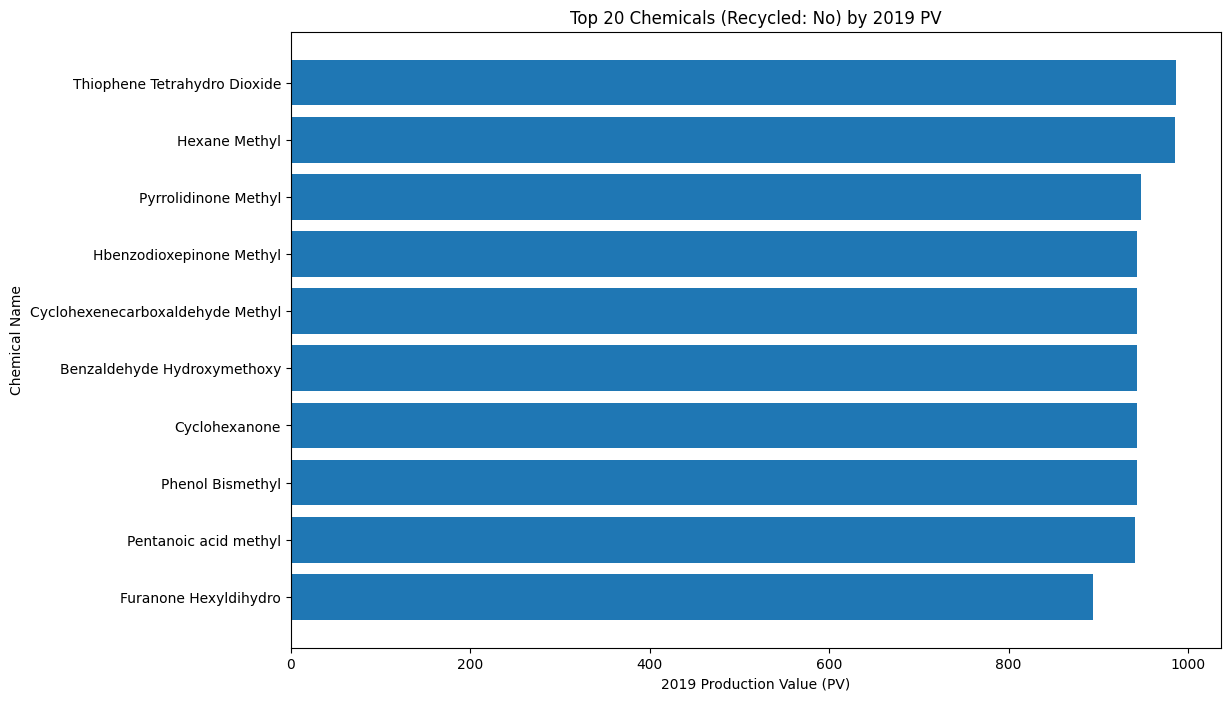

In [ ]:
n = 20
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df[df['RECYCLED NO'] == 1].copy()

# Filter for rows where 'CHEMICAL ID TYPE ACCESSION NUMBER' is true
# def_accession_number = df_recycled_no[df_recycled_no['CHEMICAL ID TYPE ACCESSION NUMBER'] == 1]

# Get the top 10 rows based on '2019 PV'
df_top_10_pv_recycled_no = df_recycled_no.nlargest(n, '2019 PV')

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top_10_pv_recycled_no['CHEMICAL NAME SUMMARY'], df_top_10_pv_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('Chemical Name')
plt.title('Top '+str(n)+' Chemicals (Recycled: No) by 2019 PV')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top

# Change bar color to red if 'CHEMICAL ID TYPE' is 'Accession Number'
for i, row in df_top_10_pv_recycled_no.iterrows():
    if row['CHEMICAL ID TYPE'] == 'Accession Number':
        bars[df_top_10_pv_recycled_no.index.get_loc(i)].set_color('red')

plt.show()

### TOP Production Value yang tidak di daur ulang dibedakan oleh bentuk fisik bahan kimianya

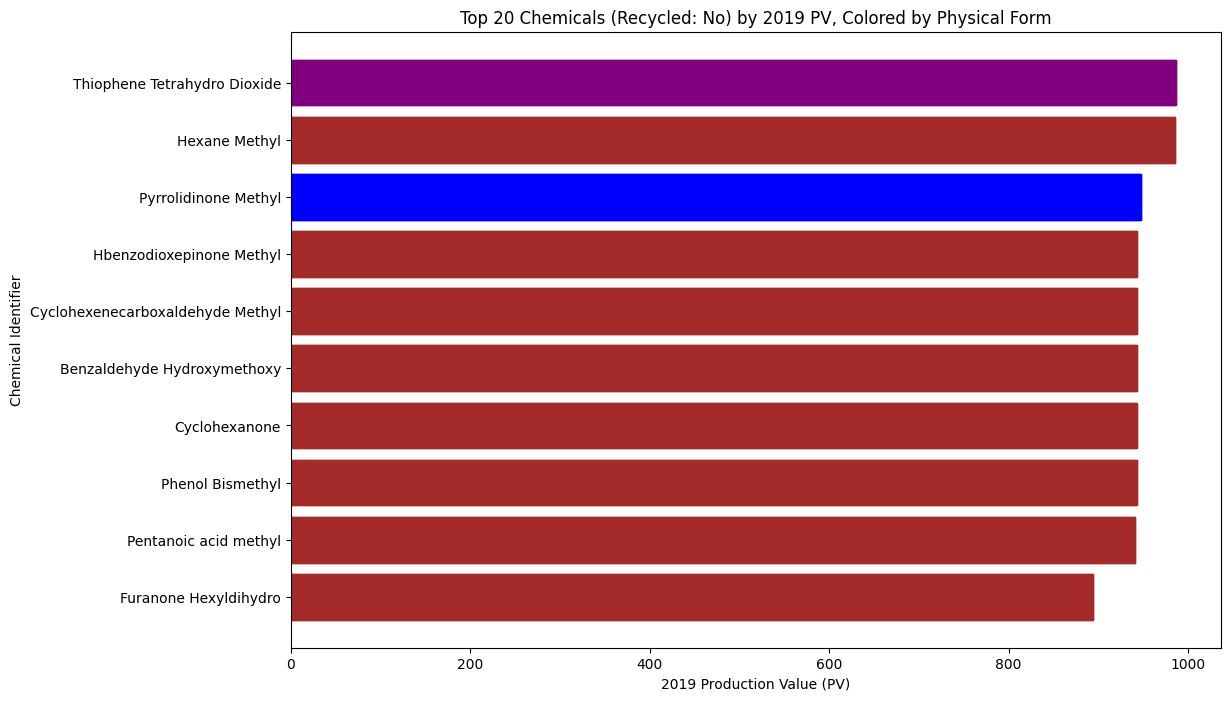

In [ ]:
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df[df['RECYCLED NO'] == 1].copy()

# Get the top 10 rows based on '2019 PV'
df_top_10_pv_recycled_no = df_recycled_no.nlargest(n, '2019 PV')

# Define the physical form columns and their priority order
physical_form_cols = [
    'PHYSICAL FORM DRY POWDER',
    'PHYSICAL FORM PELLETS OR LARGE CRYSTALS',
    'PHYSICAL FORM WATER OR SOLVENT WET SOLID',
    'PHYSICAL FORM OTHER SOLID',
    'PHYSICAL FORM GAS OR VAPOR',
    'PHYSICAL FORM LIQUID',
    'PHYSICAL FORM NKRA'
]

# Define a color map for each physical form (adjust colors as needed)
color_map = {
    'PHYSICAL FORM DRY POWDER': 'blue',
    'PHYSICAL FORM PELLETS OR LARGE CRYSTALS': 'green',
    'PHYSICAL FORM WATER OR SOLVENT WET SOLID': 'orange',
    'PHYSICAL FORM OTHER SOLID': 'purple',
    'PHYSICAL FORM GAS OR VAPOR': 'red',
    'PHYSICAL FORM LIQUID': 'brown',
    'PHYSICAL FORM NKRA': 'gray'
}

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
# Use 'CHEMICAL NAME SUMMARY' for the y-axis labels if available, otherwise use 'CHEMICAL ID'
y_labels = df_top_10_pv_recycled_no['CHEMICAL NAME SUMMARY'] if 'CHEMICAL NAME SUMMARY' in df_top_10_pv_recycled_no.columns else df_top_10_pv_recycled_no['CHEMICAL ID']
bars = plt.barh(y_labels, df_top_10_pv_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('Chemical Identifier') # Update label as appropriate
plt.title('Top '+str(n)+' Chemicals (Recycled: No) by 2019 PV, Colored by Physical Form')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top

# Iterate through the bars and color them based on physical form
for i, row in df_top_10_pv_recycled_no.iterrows():
    bar_color = 'black' # Default color if no physical form is 'Yes'
    for form_col in physical_form_cols:
        if row[form_col] == 1:
            bar_color = color_map.get(form_col, 'black') # Get color from map, default to black
            break # Apply the color for the first 'Yes' and move to the next bar

    # Find the index of the current row in the plotted data to color the correct bar
    bar_index = df_top_10_pv_recycled_no.index.get_loc(i)
    bars[bar_index].set_color(bar_color)

# You might want to add a legend to explain the colors
# This can be a bit tricky with individual bar coloring, but you can manually create one
# using plt.scatter or similar. For simplicity, a text annotation or title explanation might suffice.

plt.show()

### TOP 10 States yang mempunyai bahan kimia beracun dan tidak di daur ulang

In [ ]:
# Filter for 'Accession Number' and 'No' in 'RECYCLED'
df_accession_no_recycled = df[
    (df['CHEMICAL ID TYPE'] == 'Accession Number') &
    (df['RECYCLED'] == 'No')
]

# Count the occurrences of each state in the filtered data
state_counts = df_accession_no_recycled['SITE STATE'].value_counts().reset_index()
state_counts.columns = ['SITE STATE', 'Count']

# Sort the states by count in descending order
state_counts_sorted = state_counts.sort_values(by='Count', ascending=False).head(10)

# Get the top 3 states
top_3_states = state_counts_sorted.head(3)['SITE STATE'].tolist()

# Create a new column to indicate if a state is in the top 3
state_counts_sorted['is_top_3'] = state_counts_sorted['SITE STATE'].apply(lambda x: 'Toxic Chemical Terbanyak' if x in top_3_states else 'Other')

# Create a horizontal bar chart, coloring by the new 'is_top_3' column
fig = px.bar(state_counts_sorted,
             x='Count',
             y='SITE STATE',
             orientation='h',
             color='is_top_3', # Color based on the new column
             color_discrete_map={'Toxic Chemical Terbanyak': 'firebrick', 'Other': 'lightblue'}, # Define colors
             title='States with Most "Accession Number" and "Not Recycled" Chemicals (Top 3 Highlighted)',
             labels={'is_top_3': 'Highlight', 'SITE STATE': 'State'} # Labels for the legend
            )

# Update layout to order bars by value and potentially adjust opacity (optional)
fig.update_layout(
    yaxis={'categoryorder':'total ascending'}, # Order bars by value
    showlegend=False,
    coloraxis_showscale=False, # Hide the color scale
    margin=dict(r=12, t=42, b=42)
)
fig.update_traces(opacity=0.8) # Adjust opacity of the bars

fig.show()

### Daftar bahan kimia beracun yang tidak didaur ulang

In [ ]:
# prompt: i want list chemical that is not recycle and chemical id type accession number is true, in top_3_states

# Filter for the top 3 states identified in the previous step
df_top_3_states_toxic_not_recycled = df_accession_no_recycled[df_accession_no_recycled['SITE STATE'].isin(top_3_states)]

# Select relevant columns (Chemical Identifier and Site State)
chemical_list = df_top_3_states_toxic_not_recycled[['CHEMICAL ID', 'CHEMICAL NAME', 'CHEMICAL NAME SUMMARY', 'SITE STATE']].drop_duplicates()

# Print the list of chemicals and their states
print("List of chemicals that are not recycled and have Chemical ID Type 'Accession Number' in the top 3 states:")
chemical_list[['CHEMICAL ID', 'CHEMICAL NAME']]

List of chemicals that are not recycled and have Chemical ID Type 'Accession Number' in the top 3 states:


,CHEMICAL ID,CHEMICAL NAME
3873,154188,Alkali salts of aryl carboxylates (PROVISIONAL)
3941,122113,Alkyl ammonium salt of a transition metal hali...
3942,129001,Alkyl ammonium salt of a transition metal hali...
3943,238096,"Alkyl methacrylates, polymer with substituted ..."
3944,259111,Alkyl phosphonate (PROVISIONAL)
4138,170344,Aluminum alkoxide chelate (PROVISIONAL)
4661,257795,Amide resin (PROVISIONAL)
4787,230150,Aminophosphonate salt (PROVISIONAL)
5113,234049,Antimony tris(dialkyldithiocarbamate)
5114,243573,Antimony tris(dialkyldithiocarbamate)


### Create CSV for Flourish Chart


In [ ]:
# prompt: find where RECYCLED is No  and CHEMICAL ID TYPE is Accession Number then group it base on MAX CONC CODE then count it PHYSICAL FORM(S)
# Filter the DataFrame based on the conditions
filtered_df = df[
    (df['RECYCLED'] == 'No') &
    (df['CHEMICAL ID TYPE'] == 'Accession Number')
]

# Group by 'MAX CONC CODE' and count the occurrences of 'PHYSICAL FORM(S)'
# We are counting rows within each group, effectively counting the number of
# PHYSICAL FORM(S) entries (or rather, rows) that satisfy the conditions for each MAX CONC CODE.
grouped_count = filtered_df.groupby(['SITE STATE NAME', 'MAX CONC CODE', 'PHYSICAL FORM(S)']).agg(
    site_state=('SITE STATE NAME', 'first'),
    concentration_code=('MAX CONC CODE', 'first'),
    physical_form=('PHYSICAL FORM(S)', 'first'),
    chemical_id=('CHEMICAL ID', 'count'),
    total_workers=('WORKERS MEDIAN', 'sum') # Sum the '2019 PV' column
)

# Convert the 'total_workers' column to integer
grouped_count['total_workers'] = grouped_count['total_workers'].astype(int)

# Display the result
grouped_count.sort_values(by='total_workers', ascending=False)
grouped_count.to_csv('state_concentration_physical_form.csv', index=False)


## Nomor 3

### TOP 10 Sector dengan konsumsi bahan kimia tertinggi

In [ ]:
# prompt: I want horizontal bar chart contain top 10 of production value based on SITE NAICS CODE 1, x axis is 2019 PV
# Group by 'SITE NAICS CODE 1' and sum '2019 PV'
df_naics_pv = df.groupby('SITE NAICS NAME 1')['2019 PV'].sum().reset_index()

# Sort by '2019 PV' and get the top 10
df_top_10_naics = df_naics_pv.nlargest(10, '2019 PV')

# Get the top 3 sectors from this top 10 list
top_3_sectors = df_top_10_naics.head(3)['SITE NAICS NAME 1'].tolist()

# Create a new column to indicate if a sector is in the top 3 (within the top 10)
df_top_10_naics['is_top_3'] = df_top_10_naics['SITE NAICS NAME 1'].apply(lambda x: 'Top 3' if x in top_3_sectors else 'Other')

# Create the horizontal bar chart with a color gradient
fig = px.bar(df_top_10_naics,
             x='2019 PV',
             y='SITE NAICS NAME 1',
             orientation='h',
             title='Top 10 Production Value by SITE NAICS NAME 1 (2019)',
             color='is_top_3', # Color based on the new column
             color_discrete_map={'Top 3': 'firebrick', 'Other': 'lightblue'}, # Define discrete colors
             labels={
                 '2019 PV': '2019 Production Value (PV)',
                 'SITE NAICS NAME 1': 'Sector Name'
                 }
            )

fig.update_layout(
      yaxis={'categoryorder':'total ascending'}, # Order bars by value
      width=1000,
      height=600,
      showlegend=False,
      coloraxis_showscale=False, # Hide the color scale
      margin=dict(r=12, t=42, b=42)
    )
fig.update_traces(opacity=0.8)
fig.show()

# Save the figure as a static image
fig.write_image("Top 10 Production Value by SITE NAICS NAME 1 (2019).png")

### TOP 10 Sector yang tidak melakukan daur ulang terhadap bahan kimia yang dipakainya

In [ ]:
# prompt: I want horizontal bar chart contain top 10 of production value based on SITE NAICS CODE 1 where recycled value is no, x axis is 2019 PV
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df[
    (df['RECYCLED'] == 'No')
].copy()

# Group by 'SITE NAICS CODE 1' and sum '2019 PV' for the filtered data
df_naics_pv_recycled_no = df_recycled_no.groupby('SITE NAICS NAME 1')['2019 PV'].sum().reset_index()

# Sort by '2019 PV' and get the top 10
df_top_10_naics_recycled_no = df_naics_pv_recycled_no.nlargest(10, '2019 PV')

# Get the top 3 sectors from this top 10 list
top_3_sectors = df_top_10_naics_recycled_no.head(3)['SITE NAICS NAME 1'].tolist()

# Create a new column to indicate if a sector is in the top 3 (within the top 10)
df_top_10_naics_recycled_no['is_top_3'] = df_top_10_naics_recycled_no['SITE NAICS NAME 1'].apply(lambda x: 'Top 3' if x in top_3_sectors else 'Other')

# Create the horizontal bar chart, coloring by the new 'is_top_3' column
fig = px.bar(df_top_10_naics_recycled_no,
             x='2019 PV',
             y='SITE NAICS NAME 1',
             orientation='h',
             color='is_top_3', # Color based on the new column
             color_discrete_map={'Top 3': 'firebrick', 'Other': 'lightblue'}, # Define discrete colors
             title='Top 10 Production Value (Recycled: No) by SITE NAICS NAME 1 (2019)',
             labels={
                 'is_top_3': 'Highlight',
                 '2019 PV': '2019 Production Value (PV)',
                 'SITE NAICS NAME 1': 'Sector Name'
                 }
            )

fig.update_layout(
      yaxis={'categoryorder':'total ascending'}, # Order bars by value
      showlegend=False,
      coloraxis_showscale=False, # Hide the color scale
      margin=dict(r=12, t=42, b=42)
    )
fig.update_traces(opacity=0.8)
fig.show()


### TOP 10 Sector yang melakukan daur ulang terhadap bahan kimia yang dipakainya

In [ ]:
# prompt: I want horizontal bar chart contain top 10 of production value based on SITE NAICS CODE 1 where recycled value is no, x axis is 2019 PV
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df[df['RECYCLED'] == 'Yes'].copy()

# Group by 'SITE NAICS CODE 1' and sum '2019 PV' for the filtered data
df_naics_pv_recycled_no = df_recycled_no.groupby('SITE NAICS NAME 1')['2019 PV'].sum().reset_index()

# Sort by '2019 PV' and get the top 10
df_top_10_naics_recycled_yes = df_naics_pv_recycled_no.nlargest(10, '2019 PV')

# Get the top 3 sectors from this top 10 list
top_3_sectors = df_top_10_naics_recycled_yes.head(3)['SITE NAICS NAME 1'].tolist()

# Create a new column to indicate if a sector is in the top 3 (within the top 10)
df_top_10_naics_recycled_yes['is_top_3'] = df_top_10_naics_recycled_yes['SITE NAICS NAME 1'].apply(lambda x: 'Top 3' if x in top_3_sectors else 'Other')

# Create the horizontal bar chart, coloring by the new 'is_top_3' column
fig = px.bar(df_top_10_naics_recycled_yes,
             x='2019 PV',
             y='SITE NAICS NAME 1',
             orientation='h',
             color='is_top_3', # Color based on the new column
             color_discrete_map={'Top 3': 'seagreen', 'Other': 'lightblue'}, # Define discrete colors
             title='Top 10 Production Value (Recycled: Yes) by SITE NAICS NAME 1 (2019)',
             labels={
                 'is_top_3': 'Highlight',
                 '2019 PV': '2019 Production Value (PV)',
                 'SITE NAICS NAME 1': 'Sector Name'
                 }
            )

fig.update_layout(
      yaxis={'categoryorder':'total ascending'}, # Order bars by value
      showlegend=False,
      coloraxis_showscale=False, # Hide the color scale
      margin=dict(r=12, t=42, b=42)
    )
fig.update_traces(opacity=0.8)
fig.show()
fig.write_image("top_sectors_recycled_yes.png")

### Create CSV for Flourish Chart

In [ ]:
# prompt: I want ['SITE NAICS NAME 1', sum('2019 PV') if 'RECYCLE NO' = 1, sum('2019 PV') if 'RECYCLE YES' = 1] group by 'SITE NAICS ID 1'

# Aggregate the data as requested
df_grouped = df.groupby('SITE NAICS NAME 1').agg(
    pv_recycled_no=('2019 PV', lambda x: x[df.loc[x.index, 'RECYCLED'] == 'No'].sum()),
    pv_recycled_yes=('2019 PV', lambda x: x[df.loc[x.index, 'RECYCLED'] == 'Yes'].sum())
).reset_index()

# Rename the columns for clarity
df_grouped = df_grouped.sort_values('pv_recycled_no', ascending=False).head(10)
df_grouped.to_csv('sector_recycle_comparasion.csv', index=False)
